In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv (r'C:\Users\Kartik\Desktop\titanic.csv')

In [5]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.reset_index(drop = True, inplace = True)

In [8]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
1,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
2,7,"McCarthy, Mr. Timothy J",1,male,54.0,17463,51.8625,E46,S,0
3,11,"Sandstrom, Miss. Marguerite Rut",3,female,4.0,PP 9549,16.7000,G6,S,1
4,12,"Bonnell, Miss. Elizabeth",1,female,58.0,113783,26.5500,C103,S,1


In [9]:
df.isnull()

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
178,False,False,False,False,False,False,False,False,False,False
179,False,False,False,False,False,False,False,False,False,False
180,False,False,False,False,False,False,False,False,False,False
181,False,False,False,False,False,False,False,False,False,False


In [10]:
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,1,female,38.0,71.2833,1
1,1,female,35.0,53.1000,1
2,1,male,54.0,51.8625,0
3,3,female,4.0,16.7000,1
4,1,female,58.0,26.5500,1


In [11]:
condition_M = df.Sex == "male"
condition_B = df.Sex == "female"
df.loc[condition_M,"Sex"]=1
df.loc[condition_B,"Sex"]=0

In [12]:
X = df.iloc[: ,:-1]
Y = df.iloc[:, -1]

<AxesSubplot:>

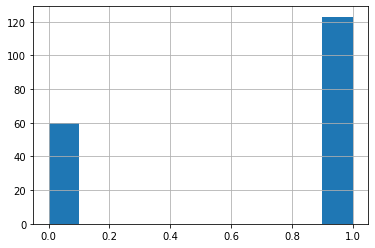

In [13]:
df["Survived"].hist()

<AxesSubplot:xlabel='Sex', ylabel='count'>

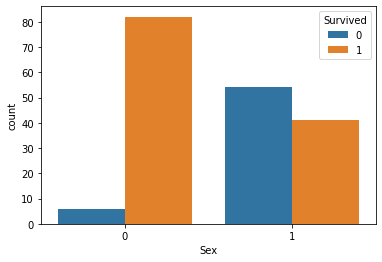

In [14]:
sns.countplot(x = 'Sex', hue = 'Survived',data =df)

<AxesSubplot:>

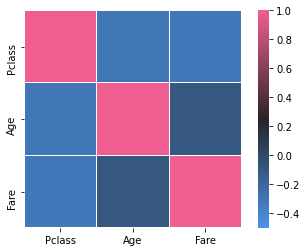

In [15]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [16]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [17]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [18]:
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]
    prior = calculate_prior(df, Y)

    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=41)

X_test = df.iloc[:,:-1].values
Y_test = df.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Survived")

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy: ")
print(accuracy_score(Y_test, Y_pred))

Accuracy: 
0.7431693989071039


In [20]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.83      0.68        60
           1       0.90      0.70      0.79       123

    accuracy                           0.74       183
   macro avg       0.74      0.77      0.73       183
weighted avg       0.79      0.74      0.75       183



In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [23]:
from sklearn.model_selection import cross_val_score, KFold

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.77272727 0.59090909 0.59090909 0.90909091 0.71428571]


In [25]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7156


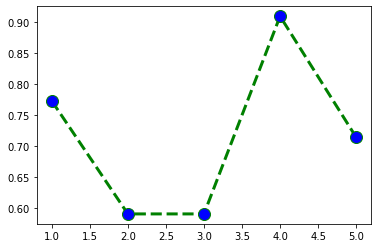

In [26]:
scr = list(scores)
x = [1, 2, 3, 4, 5]
plt.plot(x, scr, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

In [27]:
#comparision
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred_train = gnb.predict(X_train)


In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.7615


In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
mbc = MultinomialNB()

In [32]:
from sklearn.model_selection import cross_val_predict,cross_val_score,KFold

In [33]:
cross_val_score(mbc,X_train, y_train,cv=5 )

array([0.86363636, 0.36363636, 0.63636364, 0.54545455, 0.57142857])

In [34]:
mbc.fit(X, Y)

MultinomialNB()

In [35]:
y2 = mbc.predict(X_test)

In [36]:
accuracy_score(y_test, y2)

0.6351351351351351

In [37]:
#Using Question 2


In [38]:
df = pd.read_table("C:\\Users\\Kartik\\Desktop\\dataset.txt")

In [39]:
df

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [40]:
#Using historam to plot the distribution

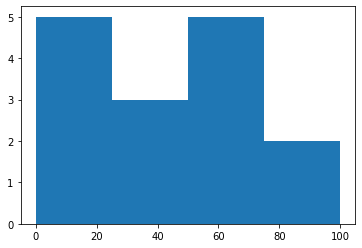

In [41]:
#just checking the template of histogram
from matplotlib import pyplot as plt
import numpy as np
a = np.array([22, 87, 5,43,56,73,55,54,11,20,51,2,79,31,27])
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(a, bins = [0, 25, 50, 75 ,100])
plt.show()

<AxesSubplot:xlabel='Area', ylabel='Count'>

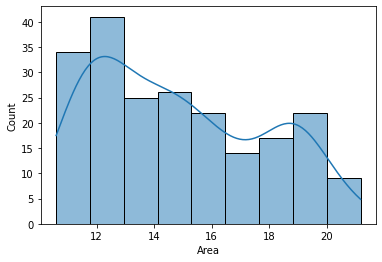

In [42]:
sns.histplot(data=df, x = "Area", kde=True)

<AxesSubplot:xlabel='Perimeter', ylabel='Count'>

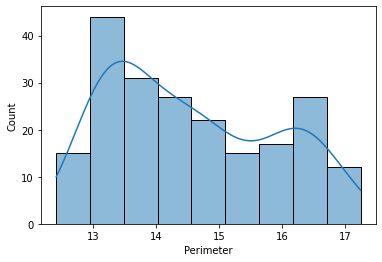

In [43]:
sns.histplot(data=df, x = "Perimeter", kde=True)

<AxesSubplot:xlabel='Compactness', ylabel='Count'>

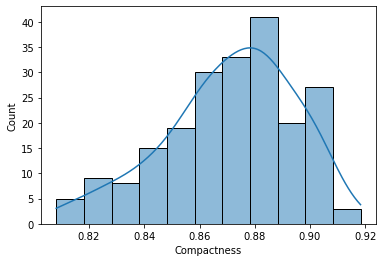

In [44]:
sns.histplot(data=df, x = "Compactness", kde=True)

<AxesSubplot:xlabel='Length of Kernel', ylabel='Count'>

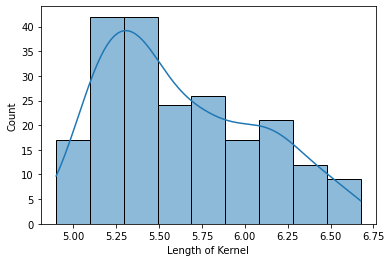

In [45]:
sns.histplot(data=df, x = "Length of Kernel", kde=True)

<AxesSubplot:xlabel='Width of Kernel', ylabel='Count'>

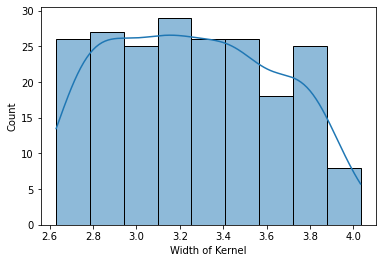

In [46]:
sns.histplot(data=df, x = "Width of Kernel", kde=True)

<AxesSubplot:xlabel='Asymmetry coefficient', ylabel='Count'>

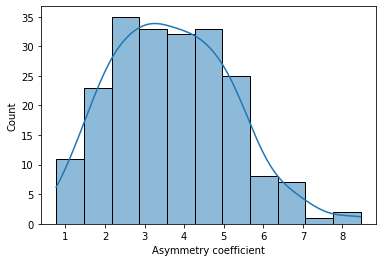

In [47]:
sns.histplot(data=df, x = "Asymmetry coefficient", kde=True)

<AxesSubplot:xlabel='Length of kernel groove', ylabel='Count'>

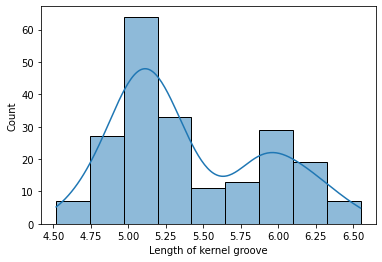

In [48]:
sns.histplot(data=df, x = "Length of kernel groove", kde=True)

<AxesSubplot:xlabel='Class', ylabel='Count'>

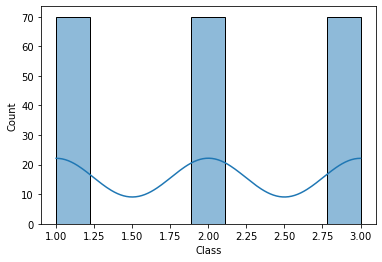

In [49]:
sns.histplot(data=df, x = "Class", kde=True)

<AxesSubplot:ylabel='Count'>

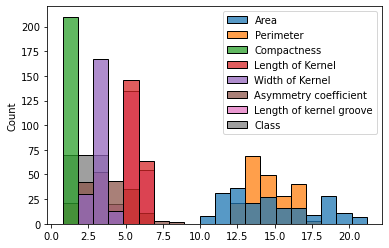

In [50]:
sns.histplot(data=df)

In [51]:
def probability(dic, n):
    for i in dic:
        dic[i] = dic[i]/n
    return dic

In [52]:
#calculating the prior probability of all the classes
def Prior_Probability(cls):
    d = {}
    for i in cls:
        if i not in d:
            d[i] = 1
        else:
            d[i]+=1
    
    return probability(d, len(cls))

In [53]:
Prior_Probability(df['Class'])

{1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333}

In [54]:
#coming onto discetizer
#first trying the sample for practice(inbuilt)


In [55]:
min(df['Area'])

10.59

In [76]:
#binning in python
def create_bins(lower_bound, width, quantity):
    bins = []
    for low in range(lower_bound, lower_bound+quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [77]:
#we are creating five bins and a width of 10 starting from lower bound 10
bins = create_bins(lower_bound=10, width=3, quantity=4)
bins

TypeError: 'tuple' object is not callable

In [58]:
def find_bin(value, bins):
    for i in range(0, len(bins)):
        if bins[i][0] <= value < bins[i][1]:
            return i
    return -1

In [59]:
from collections import Counter

In [60]:
l = list(df['Perimeter'])

In [61]:
binned_weights =  []
for value in l:
    bin_index  =find_bin(value, bins)
    print(value, bin_index, bins[bin_index])
    binned_weights.append(bin_index)
freq = Counter(binned_weights)
print(freq)

14.84 1 (13, 16)
14.57 1 (13, 16)
14.09 1 (13, 16)
13.94 1 (13, 16)
14.99 1 (13, 16)
14.21 1 (13, 16)
14.49 1 (13, 16)
14.1 1 (13, 16)
15.46 1 (13, 16)
15.25 1 (13, 16)
14.85 1 (13, 16)
14.16 1 (13, 16)
14.02 1 (13, 16)
14.06 1 (13, 16)
14.05 1 (13, 16)
14.28 1 (13, 16)
13.83 1 (13, 16)
14.75 1 (13, 16)
14.21 1 (13, 16)
13.57 1 (13, 16)
14.4 1 (13, 16)
14.26 1 (13, 16)
14.9 1 (13, 16)
13.23 1 (13, 16)
14.76 1 (13, 16)
15.16 1 (13, 16)
13.76 1 (13, 16)
13.67 1 (13, 16)
14.18 1 (13, 16)
14.02 1 (13, 16)
13.82 1 (13, 16)
14.94 1 (13, 16)
14.41 1 (13, 16)
14.17 1 (13, 16)
14.68 1 (13, 16)
15.0 1 (13, 16)
15.27 1 (13, 16)
15.38 1 (13, 16)
14.52 1 (13, 16)
14.17 1 (13, 16)
13.85 1 (13, 16)
13.85 1 (13, 16)
13.55 1 (13, 16)
14.86 1 (13, 16)
14.54 1 (13, 16)
14.04 1 (13, 16)
14.76 1 (13, 16)
14.56 1 (13, 16)
14.52 1 (13, 16)
14.67 1 (13, 16)
14.4 1 (13, 16)
14.91 1 (13, 16)
14.61 1 (13, 16)
14.28 1 (13, 16)
14.6 1 (13, 16)
14.77 1 (13, 16)
14.35 1 (13, 16)
14.43 1 (13, 16)
14.77 1 (13, 16)
13.

(array([  5., 146.,  59.,   0.]),
 array([10.  , 12.75, 15.5 , 18.25, 21.  ]),
 <BarContainer object of 4 artists>)

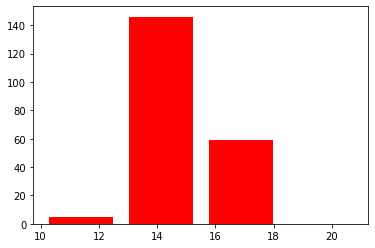

In [62]:
range = (10, 21)
bins = 4
plt.hist(l, bins, range, color = 'red',
        histtype = 'bar', rwidth = 0.8)

In [63]:
df2 = df.copy()

## BINNING

In [64]:
#Creating four bins
df1 = df.copy()

In [65]:
df1

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [66]:
''''df1.loc[(df1["Area"] >=10) & (df1["Area"] <13), "Area"] = 0
df1.loc[(df1["Area"] >=13) & (df1["Area"] <16), "Area"] = 1
df1.loc[(df1["Area"] >=16) & (df1["Area"] <19), "Area"] = 2
df1.loc[(df1["Area"] >=19) & (df1["Area"] <22), "Area"] = 3
df1''''

SyntaxError: EOL while scanning string literal (<ipython-input-66-f250426cc495>, line 5)

In [ ]:
def create_bins(lower_bound, width, quantity):
    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [ ]:
def find_bin(value, bins):
    for i in range(0, len(bins)):
        if bins[i][0] <= value < bins[i][1]:
            return i
    return -1

In [67]:
#lets go for the 'AREA'
weights_of_persons = list()

In [75]:
lb = int(min(weights_of_persons))
bins = create_bins(lower_bound=lb, width=3, quantity=4)


TypeError: 'tuple' object is not callable